# Long Short-Term Memory (LSTM) Networks

## 1. Overview
Long Short-Term Memory (LSTM) networks are a special kind of **Recurrent Neural Network (RNN)** capable of learning long-range temporal dependencies. Introduced by *Hochreiter & Schmidhuber (1997)*, LSTMs mitigate the vanishing- and exploding-gradient problems that plague vanilla RNNs, enabling them to remember information for extended periods and learn complex sequence relationships.

---

## 2. Motivation
Vanilla RNNs update their hidden state by repeatedly multiplying it by weight matrices through time. This repeated multiplication often drives gradients towards zero or infinity during back-propagation through time (BPTT), preventing effective learning of long-term dependencies.  
LSTMs address this issue with **gated additive connections** that regulate information flow, allowing gradients to propagate more stably.

---

## 3. Core Architecture
An LSTM cell augments the traditional RNN cell with **four interacting components**:

1. **Forget Gate** $\;f_t$
2. **Input Gate** $\;i_t$
3. **Candidate Cell State** $\;\tilde{c}_t$
4. **Output Gate** $\;o_t$

These gates control the cell state $c_t$, which acts as the network’s memory.

---

### 3.1 Gate & State Equations  

Let  
* $x_t \in \mathbb{R}^n$ – input at time step $t$  
* $h_{t-1} \in \mathbb{R}^m$ – previous hidden state  
* $\sigma(\cdot)$     – logistic sigmoid  
* $\tanh(\cdot)$     – hyperbolic tangent  
* $W_\ast, U_\ast, b_\ast$ – learnable parameters  

The forward pass for a single LSTM cell is:

<div align="center">

$$\begin{aligned}
f_t &= \sigma\!\bigl(W_f x_t + U_f h_{t-1} + b_f\bigr) \quad &\text{(forget gate)}\\[4pt]
i_t &= \sigma\!\bigl(W_i x_t + U_i h_{t-1} + b_i\bigr) \quad &\text{(input gate)}\\[4pt]
\tilde{c}_t &= \tanh\!\bigl(W_c x_t + U_c h_{t-1} + b_c\bigr) \quad &\text{(cell candidate)}\\[4pt]
c_t &= f_t \odot c_{t-1} \;+\; i_t \odot \tilde{c}_t \quad &\text{(cell state update)}\\[6pt]
o_t &= \sigma\!\bigl(W_o x_t + U_o h_{t-1} + b_o\bigr) \quad &\text{(output gate)}\\[4pt]
h_t &= o_t \odot \tanh(c_t) \quad &\text{(hidden state)}
\end{aligned}$$

</div>

where $\odot$ denotes element-wise (Hadamard) product.

---

## 4. Intuitive Function of Gates

| **Gate** | **Role** | **Effect if “On” (≈1)** | **Effect if “Off” (≈0)** |
|----------|----------|-------------------------|--------------------------|
| Forget $f_t$   | Decides what old information to erase | Keep past memory intact | Erase past memory |
| Input $i_t$    | Decides what new information to store | Add new candidate $\tilde{c}_t$ | Ignore new candidate |
| Output $o_t$   | Decides what part of memory to expose | Pass relevant memory to $h_t$ | Hide memory from output |

---

## 5. Variants & Extensions
* **Peephole LSTM** – gates receive direct connections from the previous cell state $c_{t-1}$  
* **Bidirectional LSTM (Bi-LSTM)** – processes sequences in both forward and reverse directions  
* **Stacked / Deep LSTM** – multiple LSTM layers for hierarchical temporal abstraction  
* **Coupled or CIFG** – combines forget and input gates to reduce parameters  
* **ConvLSTM & GridLSTM** – adapt LSTM to spatial data (e.g., images)  
* **Attention-Augmented LSTM** – adds attention mechanisms for selective focus

---

## 6. Advantages
* **Long-range dependency learning** without severe gradient decay  
* **Flexible gating** allows dynamic memory updates per time step  
* **Wide applicability** across NLP, speech recognition, time-series forecasting, video analysis, etc.

---

## 7. Limitations
* **Computationally intensive** compared to simpler RNNs or GRUs  
* **Sequential processing** limits parallelism (although techniques like truncated BPTT and Transformer models offer alternatives)  
* **Large parameter count** may lead to overfitting without sufficient data or regularization

---

## 8. Key References
* Hochreiter, S., & Schmidhuber, J. (1997). *Long Short-Term Memory*. **Neural Computation, 9**(8), 1735-1780.  
* Gers, F. A., Schmidhuber, J., & Cummins, F. (2000). *Learning to Forget: Continual Prediction with LSTM*. **Neural Computation, 12**(10), 2451-2471.  
* Graves, A. (2012). *Supervised Sequence Labelling with Recurrent Neural Networks*. **Springer**.  
* Greff, K., Srivastava, R. K., Koutník, J., Steunebrink, B. R., & Schmidhuber, J. (2017). *LSTM: A Search Space Odyssey*. **IEEE Transactions on Neural Networks and Learning Systems, 28**(10), 2222-2232.

---

> **Quick Recap:**  
> 1. LSTMs introduce gating mechanisms to regulate information flow.  
> 2. The cell state $c_t$ serves as a persistent memory.  
> 3. Properly configured, LSTMs excel at modeling sequential data with long-term dependencies.

---


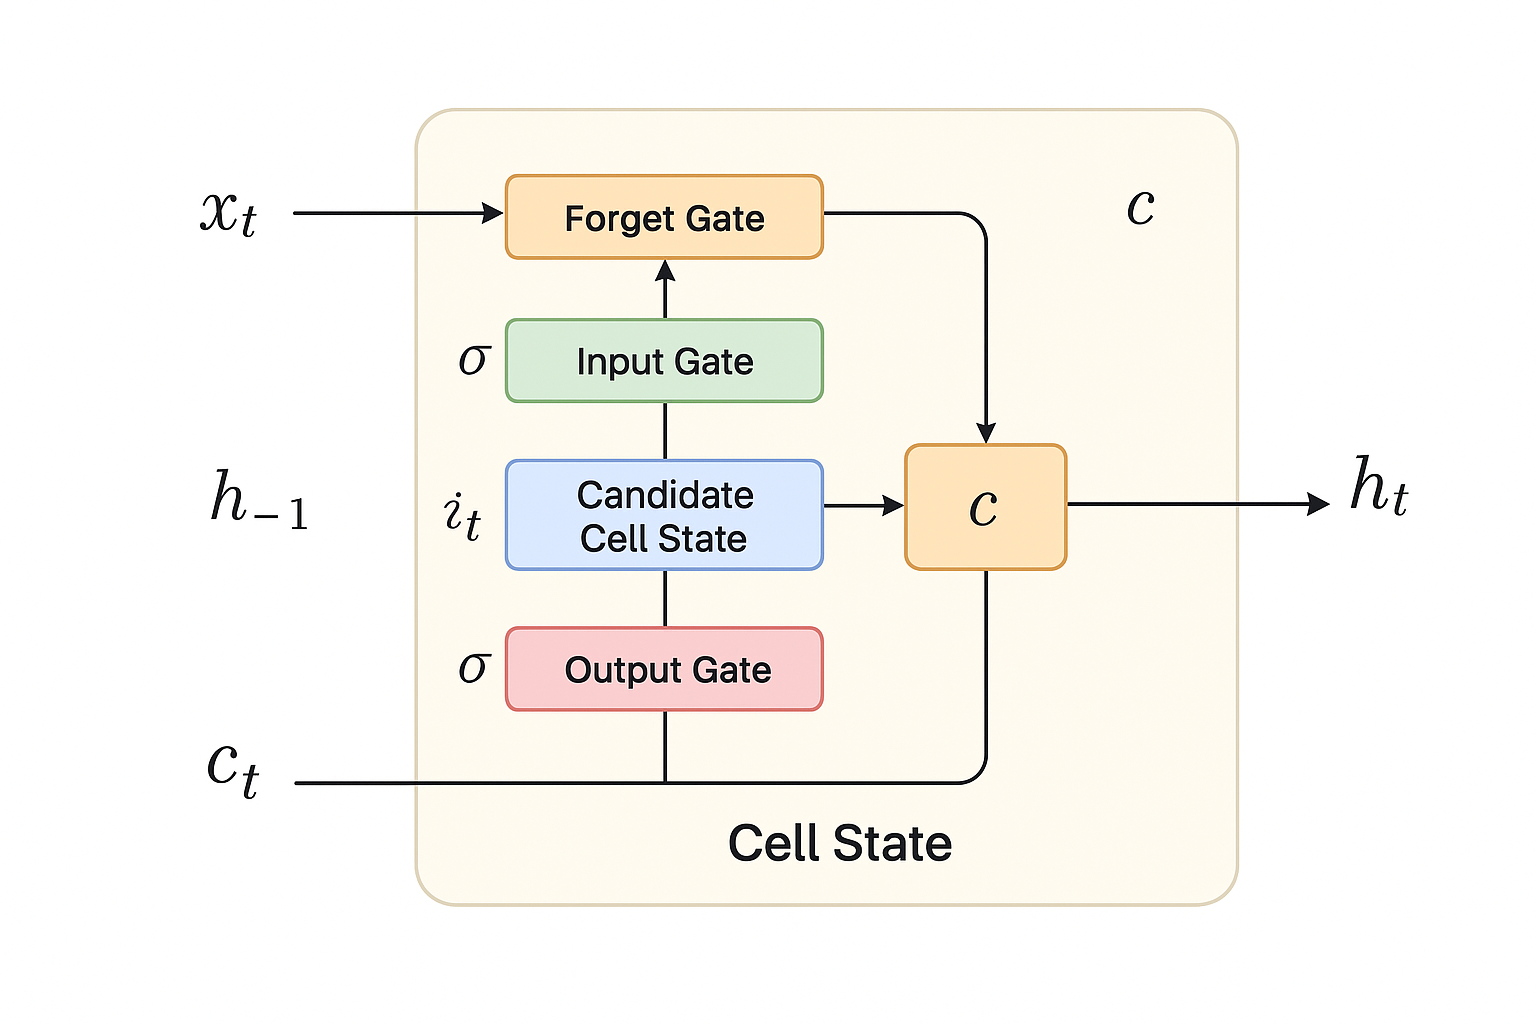